# Lab 1: Basic Data Analysis

The purpose of this portion of the lab is to get you started running Jupyter notebooks and familiar loading and analyzing data in a notebook. In particular, we will explore the basics of NumPy and Pandas by exploring of some public policy datasets from the Chicago Data Portal. Some of the examples below are adapted from *Machine Learning with Python Cookbook* by Chris Albon.

Parts 0, 1 & 2 involve running provided code to become familiar with the libraries. Don't rush through these parts just because the code already works. Instead, make sure you understand what is happening and how to replicate it if you were given similar data without the provided code. Part 3 involves writing your own code to explore a dataset.



# 0. Jupyter Notebooks

Elements in a notebook are divided into cells, which might be markdown text (such as this cell) or code (such as the next cell). You can execute either type of cell by clicking on it and typing "Shift + Enter". Executing a markdown cell typesets the text. Executing a code cell runs the code. Execute the following cell to run the "Hello World" program.

In [7]:
print("Hello, World")

Hello, World


You can also define functions and variables in cells. Once you have run the cell, the functions and variables are available to any cell in the notebook, *even cells **above** where the variables or functions were defined.* This can be a source of bugs if you start running cells out of order and forget that a later cell overwrote a function or variable value. 

**Inportant:** If you want to reset the notebook and remove all defined values, use the Kernel > Restart Kernel option from the menu bar. 

## 1. NumPy


NumPy is the foundation of the Python machine learning stack. It allows for efficient operations on the data structures often used in machine learning: vectors, arrays, and matrices.

This section covers the most common NumPy operations you are likely to run into when preparing data for ML

* 1.1 Creating a Vector
* 1.2 Creating an Array
* 1.3 Selecting Elements in an Array
* 1.4 Describing an Array
* 1.5 Math with Arrays and Vectors
* 1.7 Calculating Basic Statistics
* 1.8 Reshaping Arrays
* 1.9 Other Array Operations


### 1.1 Creating a Vector

Use NumPy's built in array type to create a one-dimensional vector

In [1]:
# load library
import numpy as np

# create a row vector
vector_row = np.array([1, 2, 3])

# create a column vector
vector_column = np.array([[1],
                          [2],
                          [3]])

# display
print(vector_row)
print(vector_column)

[1 2 3]
[[1]
 [2]
 [3]]


### 1.2 Creating an Array (Matrix)

To create a 2D or higher-dimensional matrix, we use NumPy's "array" type. The code below creates an array (matrix) with three rows and two columns (a column of 1s and a column of 2s).

In [9]:
# create a matrix
matrix = np.array([[1, 2],
                   [1, 2],
                   [1, 2]])

# display
print(matrix)

[[1 2]
 [1 2]
 [1 2]]


### 1.3 Selecting Elements in an Array
You often need to select one or more elements in a vector or array. Fortunately, NumPy arrays make that easy. Like most things in Python, NumPy arrays are zero-indexed, meaning that the index of the first element is 0, not 1. With that caveat, NumPy offers a wide variety of methods for selecting (i.e., indexing and slicing) elements or groups of elements in arrays. Some examples are shown below:

In [10]:
# create row vector
vector = np.array([1, 2, 3, 4, 5, 6])

# create array
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

In [11]:
# select the third element of vector
vector[2]

3

In [12]:
# select the last element of vector
vector[-1]

6

In [13]:
# Select all elements of vector
vector[:]

array([1, 2, 3, 4, 5, 6])

In [14]:
# select everything up to and including the third element of vector
vector[:3]

array([1, 2, 3])

In [15]:
# select second row, second column of array
matrix[1,1]

5

In [16]:
# select the first two rows and all columns of array
matrix[:2, :]

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
# select all rows and the second column of array
matrix[:,1:2]

array([[2],
       [5],
       [8]])

These techniques generalize beyond 2D arrays to arbitrary dimensions.

### 1.4 Describing an Array

If it often helpful to be able to describe the shape, size, and dimensions of a NumPy array. The shape, size, and ndim functions allow you to do this.

In [18]:
# create array
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

# view number of rows and columns
matrix.shape

(3, 4)

In [19]:
# view number of elements (rows * columns)
matrix.size

12

In [20]:
# view number of dimensions
matrix.ndim

2

Although this might seem basic, it is frequently valuable to check the shape and size of an array before further calculations (e.g. to make sure it is the right shape for input into a ML algorithm) or simply as a gut check after performing an operation

### 1.5 Math with Arrays and Vectors

When performing operations involving a vector or array and a scaler (single number not in a vector or array), NumPy allows you to use the built-in math operators +, -, * and / through a process called "broadcasting." For example, suppose you want to add 1000 to all elements of an array: 

In [21]:
# create array
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# add 1000 to all elements
new_matrix = matrix + 1000

# print the result
print(new_matrix)

[[1001 1002 1003]
 [1004 1005 1006]
 [1007 1008 1009]]


You might have expected a TypeError, because this involved adding an Array type to an Integer type. However, NumPy automatically broadcasts the operation with the single integer (or float) over all elements of the array. A common preprocessing operation involves adding 1 to arrays with very small values to avoid doing math on small fractions. 

When performing operations involving only vectors and/or arrays, you should use the NumPy methods with the operation name. These methods all operate **elementwise** (meaning that they add/subtract/multiply/divide the elements in corresponding positions in the operands

In [22]:
# create two arrays
matrix1 = np.array([[1, 2],
                   [3, 4]])

matrix2 = np.array([[10, 20],
                   [30, 40]])

# operation examples
print( np.add(matrix1, matrix2) )
print( np.subtract(matrix1, matrix2) )
print( np.multiply(matrix1, matrix2) )

[[11 22]
 [33 44]]
[[ -9 -18]
 [-27 -36]]
[[ 10  40]
 [ 90 160]]


If you are familiar with vector calculus or linear algrabra, there are also vector and matrix operation functions in NumPy. For example, you can calculate the dot product of two vectors. You can also calculate the matrix product of two vectors, two matrices, or a vector and a matrix as long as they have compatible shapes.

In [23]:
# Create a vector and a matrix
vector = np.array([1,2])
matrix = np.array([[1, 2], [3, 4]])

In [24]:
# dot product
print( vector.dot(vector) )

5


In [25]:
# matrix multiply
print( np.matmul(matrix, matrix) )

[[ 7 10]
 [15 22]]


### 1.6 Basic Statistics

NumPy also provides functions for computing basic statistics about data arrays. It is often helpful to inspect these statistics before ML training to better understand your data. 

In [26]:
# create array
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# find maximum element
np.max(matrix)

9

In [27]:
# find minimum element
np.min(matrix)

1

In [22]:
# find maximum element in each column
np.max(matrix, axis=0)

array([7, 8, 9])

In [23]:
# find maximum element in each row
np.max(matrix, axis=1)

array([3, 6, 9])

In [24]:
# find mean across entire matrix
np.mean(matrix)

5.0

In [25]:
# find the mean value in each column
np.mean(matrix, axis=0)

array([4., 5., 6.])

In [26]:
# find the mean value in each row
np.mean(matrix, axis=1)

array([2., 5., 8.])

In [27]:
# find variance across entire matrix
np.var(matrix)

6.666666666666667

In [28]:
# find standard deviation across entire matrix
np.std(matrix)

2.581988897471611

### 1.7 Reshaping Arrays

Machine learning algorithms often expect input data in a particular shape or dimensionality. NumPy makes it easy to change the shape (number of rows and columns) of an array without changing the element values.

In [3]:
# create 4x3 matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

# reshape matrix into 2x6 matrix
matrix.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

The reshape() function allows us to restructure an array so that we maintain the same data but it is organized as a different number of rows and columns. The only requirement is that the shape of the original and new matrix contain the same number of elements (i.e., the same size). We can see the size of a matrix using the size field:

In [4]:
matrix.size

12

One useful argument to reshape is -1, which effectively means “as many as needed,” so reshape(1, -1) means one row and as many columns as needed:

In [5]:
matrix.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

Finally, if we provide one integer, reshape will return a 1D array of that length. The flatten() function will also do the same thing. 

In [6]:
matrix.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [7]:
matrix.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Occasionally, you may want to transpose a vector or matrix. Transposing is a common operation in linear algebra where the column and row indices of each element are swapped. Transposition is performed in NumPy using the T field:

In [8]:
matrix.T

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

One nuanced point is that, technically, a vector cannot be transposed because it is just a collection of values:

In [9]:
# transpose vector
np.array([1, 2, 3, 4, 5, 6]).T

array([1, 2, 3, 4, 5, 6])

However, it is common to refer to transposing a vector as converting a single-row array (row vector) to a single-column array (column vector) or vice versa:

In [10]:
# transpose row vector into column vector
np.array([[1, 2, 3, 4, 5, 6]]).T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

Using a row vector when you should have a column vector (or vice versa) is a common gotcha when supplying data to ML algorithms!

### 1.8 Other Array Operations

NumPy provides many more built-in functions and methods for performing operations on data arrays. Descriptions are all available in the NumPy documentation. 

**Important Tip:** If you are ever considering writing a loop to process a data array one element at a time, there are probably more efficient methods using array operations and array broadcasting. Stack Overflow is very helpful for finding these tricks.

# 2. Pandas

The Pandas library simplifies the import and manipulation of labeled data arrays (arrays where the rows and columns have names). 

This section provides examples of some common Pandas operations you are likely to run into when preparing data for ML:

* 2.1 Loading (Importing) Data
* 2.2 Basic Data Exploration
* 2.3 Handling Time Series
* 2.4 Plotting Data
* 2.5 Additional Pandas Operations




In [1]:
# load library
import pandas as pd

### 2.1 Loading (Importing) Data

Pandas lets you easily import data from CSV, Excel, and JSON files. Let's explore the cta-ridership.csv dataset from the Chicago Data Portal with information about rides on the Chicago "L" system. The first step is to import the data and see what it looks like

In [2]:
df = pd.read_csv('cta-ridership.csv')
df.head(5)

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


### 2.2 Basic Data Exploration

Just from looking at the first 5 rows, we can get an understanding of the type of the data.  There's a station identifier and name, a date on which the statistic takes place, the day type, and the number of rides for that date.

It's not immediately clear what A/W, is, but looking at the description of the dataset here:
https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f tells us that this column indicates that we are looking at a weekday, weekend, or holiday.

We can then explore some basic characteristics of the data, including the size of the dataset, min/max/etc. to explore outliers, etc. This basic exploration allows us to spot potential outliers and mistakes in the data.

In [3]:
df.shape

(1028040, 5)

So the data has 1028040 rows and 5 columns

In [4]:
df.describe()

,station_id,rides
count,1.028040e+06,1.028040e+06
mean,4.076423e+04,3.247045e+03
std,4.477007e+02,3.201788e+03
min,4.001000e+04,0.000000e+00
25%,4.037000e+04,1.065000e+03
50%,4.076000e+04,2.225000e+03
75%,4.115000e+04,4.267000e+03
max,4.170000e+04,3.632300e+04


We notice that there is a station with no rides (minimum is zero!). Also, the station with the maximum number of rides appears to be about 10x the mean and median. Let's have a look at what station that is.

In [15]:
# find the station with the most rides. This expression uses a technique called "boolean indexing" and may take some work to parse. Try to sort out what's going on before proceeding
df[ df['rides'] == np.max(df['rides']) ].head(1)

,station_id,stationname,date,daytype,rides
825568,41320,Belmont-North Main,06/28/2015,U,36323


We can also find the stations with 0 rides on particular days:

In [16]:
# find stations/day combos with 0 rides 
zero = df[df['rides'] == 0]

# display 5 of them
zero.head(5)

,station_id,stationname,date,daytype,rides
23,40200,Randolph/Wabash,12/25/2017,U,0
110,40640,Madison/Wabash,12/05/2017,W,0
333,40640,Madison/Wabash,12/03/2017,U,0
354,40640,Madison/Wabash,12/11/2017,W,0
423,40640,Madison/Wabash,12/30/2017,A,0


Looks like a lot of weekends and holidays.  We can group by columns and types to get a better understanding of what might be going on. We then use these groups to count how many dates a station had zero rides and sort these in descending order.

In [17]:
zerogroups = zero.groupby(['stationname','daytype']).count()
zerogroups.sort_values(by=['date'],ascending=False)

station_id  date  rides
stationname      daytype                         
Madison/Wabash   W               711   711    711
Washington/State W               516   516    516
Skokie           U               390   390    390
                 A               355   355    355
Randolph/Wabash  W               351   351    351
...                              ...   ...    ...
Linden           U                 1     1      1
51st             U                 1     1      1
Ashland-Lake     W                 1     1      1
Grand/Milwaukee  W                 1     1      1
Indiana          A                 1     1      1

[262 rows x 3 columns]

It should be clear from a little bit of research why some of the stations at the top of the list report dates with 0 rides. If you're curious, do some searching to find out!

**Note:** The groupby() function is very powerful, enabling statistics and feature extraction from combinations (groups) of data attributes. However, groupby() does not return an array directly, but a GroupBy object that must have other functions applied to it to be useful. Again, the Pandas documentation and Stack Overflow are your friends. 

### 2.3 Handling Time Series

Many ML problems involve identifying temporal patterns in data. Pandas makes it easy to treat columns of a dataset as dates and handle them appropriately (although some ML algorithms will require conversion into a specific time format, e.g. UNIX time)

Let's continue with the CTA ridership data for this section. First, lets see what the time range is in the dataset

In [18]:
np.min(df['date'])

'01/01/2001'

In [19]:
np.max(df['date'])

'12/31/2019'

So we have all rides from January 1, 2001 to December 31, 2019. Let's do some statistics that group rides by date. First we need to tell Pandas that the date column is in fact a date. So, we convert the column to a proper 'DateTime' type, and then set the index to this column.

In [20]:
# change the 'date' column to a datetime object and set that column as the index of the dataset
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df.head(10)

,station_id,stationname,daytype,rides
date,,,,
2017-12-22,41280,Jefferson Park,W,6104
2017-12-18,41000,Cermak-Chinatown,W,3636
2017-12-02,40280,Central-Lake,A,1270
2017-12-19,40140,Dempster-Skokie,W,1759
2017-12-03,40690,Dempster,U,499
2017-12-30,41660,Lake/State,A,8615
2017-12-17,40180,Oak Park-Forest Park,U,442
2017-12-02,40250,Kedzie-Homan-Forest Park,A,1353
2017-12-07,40120,35th/Archer,W,3353


Now the date column is the index, but the rows are not sorted chronologically. We can fix this with a sort function.

In [21]:
# Sort the columns by date
rides_by_date = df.sort_values(by='date')

rides_by_date.head(10)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,41660,Lake/State,U,2942
2001-01-01,40330,Grand/State,U,2542
2001-01-01,40490,Grand/Milwaukee,U,182
2001-01-01,41170,Garfield-Dan Ryan,U,1457
2001-01-01,40790,Monroe/Dearborn,U,342
2001-01-01,40240,79th,U,2470
2001-01-01,41320,Belmont-North Main,U,2872
2001-01-01,40020,Harlem-Lake,U,633
2001-01-01,41190,Jarvis,U,590


That looks better. But it sure would be easier to visualize this data in the form of a plot...

### 2.4 Plotting Data

Plotting data is extremely useful for understanding it's properties. We will be using a combination of the Matplotlib, Seaborn, and Pandas libraries for plotting data in this class. 
Plotting is as much an art as a science, and everything you learned in middle and high school science classes about making plots clear, nondeceptive, and well-labeled still applies here.

In [22]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Tell Jupyter notebooks to put the plot below the cell rather than in a separate window
%matplotlib inline 

# set the size of the plot
sns.set(rc={'figure.figsize':(11, 4)})

The following example shows one way to plot the CTA ridership from the Garfield Green station over time:

Text(0.5, 0, 'Date')

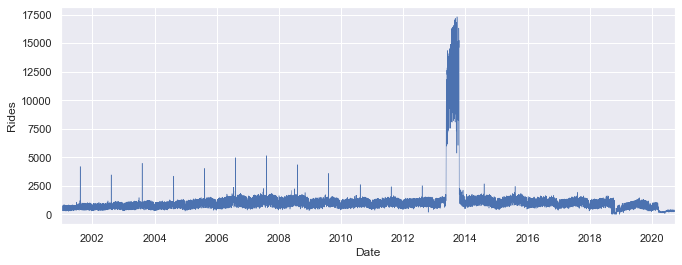

In [23]:
# select rides from the Garfield Green Line station
garfield_green = rides_by_date[rides_by_date['stationname'] == 'Garfield-South Elevated']

# plot the rides using the Pandas plot method
garfield_green['rides'].plot(linewidth=0.5)

# Label the plot
plt.ylabel("Rides")
plt.xlabel("Date")
# There are many more matplotlib functions for making plots prettier. The Matplotlib documentation has examples of their use, and we will see more in future class exercises

This indicates that something unusual may have happened near the Garfield Green Line in the early part of 2014...that or there was a problem with the data collection during that period that resulted in inflated ridership counts

### 2.5 Additional Pandas Operations
Like NumPy, Pandas comes with many more builtin functions and methods for manipulating data. Descriptions are all available in the Pandas documentation, and Google searches are a good place to start if you want to know how to do something specific.

# Part 3. Try It Yourself

In this section, you will try writing your own code to answer the following questions about the CTA ridership data. Your code should print the answer to the questions with as little extra "fluff" as possible

#### 3.1 What is the number of rows and columns in the data set? 

This is a repeat from above, but it is crucial to understanding the data

In [3]:
import numpy as np
dfnew = pd.read_csv('cta-ridership.csv')
dfnew.head(5)
print("Rows: " + str(dfnew.shape[0]))
print("Columns: " + str(dfnew.shape[1]))


Rows: 1028040
Columns: 5


#### 3.2 What are the start and end dates of the rides in the data set?

It is typically important to understand basic information about the data, such as when it starts and ends. Performing these kinds of basic sanity checks on the data is critical and something you should always do when exploring a new dataset.

In [22]:
dates = dfnew.sort_values(by="date")
print(np.min(dfnew['date']))
print(np.max(dfnew['date']))

01/01/2001
12/31/2019


#### 3.3 What are the five stations with the most rides?


In [25]:
max_rides = dfnew.sort_values(by='rides',ascending=False)
max_rides.head(5)

,station_id,stationname,date,daytype,rides
825568,41320,Belmont-North Main,06/28/2015,U,36323
352682,41320,Belmont-North Main,06/24/2012,U,36017
544984,41660,Lake/State,11/04/2016,W,35845
547592,41320,Belmont-North Main,06/26/2011,U,33795
159487,41420,Addison-North Main,10/29/2016,A,33615


In [19]:
# YOUR CODE HERE# find stations/day combos with 0 rides 
zero = df[df['rides'] == 0]

# display 5 of them
zero.head(5)

,station_id,stationname,date,daytype,rides
23,40200,Randolph/Wabash,12/25/2017,U,0
110,40640,Madison/Wabash,12/05/2017,W,0
333,40640,Madison/Wabash,12/03/2017,U,0
354,40640,Madison/Wabash,12/11/2017,W,0
423,40640,Madison/Wabash,12/30/2017,A,0


#### 3.4 What is the average number of rides per day for the W daytype?

In [5]:
# YOUR CODE HERE
W = dfnew[dfnew['daytype'] == 'W']
print(np.mean(W['rides']))

3827.0251945216464


#### 3.5 Data Exploration on Your Own

Pick a simple question or hypothesis related to the ridership data, justify **why** you picked that question (i.e., why it might be an interesting question to some audience, such as city officials), and present a simple analysis. 

It is interesting to look at the average rides per daytype since it could influence policy on how often the train runs during different times. There is no need to run trains frequently when there is a low number of riders but there is the need when in high demand. It would be even more interesting to look at how the average rides per daytype looks over the course of the year as it could influence seasonal train scheduals. 

In [8]:
# YOUR CODE HERE (add cells below as needed)
A = dfnew[dfnew['daytype'] == 'A']
U = dfnew[dfnew['daytype'] == 'U']
print(np.mean(W['rides']),np.mean(A['rides']),np.mean(U['rides']))


3827.0251945216464 2222.855356190424 1616.8256328456357
